In [5]:
import pandas as pd

trafico = pd.read_csv("datos/standarizedDataset.csv")


trafico.columns

C:\Users\adali\AppData\Local\Temp\ipykernel_15652\3541846404.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  trafico = pd.read_csv("datos/standarizedDataset.csv")


Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [7]:
feature_selection1 = [' Destination Port', ' Protocol', ' Flow Duration', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Std',
                     ' Flow IAT Mean', ' Flow IAT Max', ' Fwd IAT Mean', ' Fwd IAT Max', ' Fwd IAT Min',  ' Fwd Header Length',
                     'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Std', ' ACK Flag Count', ' Average Packet Size',
                     ' Fwd Header Length.1', 'Subflow Fwd Packets', 'Init_Win_bytes_forward', ' min_seg_size_forward', ' Label']


selected_traffic_info = trafico[feature_selection1]

selected_traffic_info.head()


,Destination Port,Protocol,Flow Duration,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Flow IAT Mean,Flow IAT Max,Fwd IAT Mean,Fwd IAT Max,...,Min Packet Length,Max Packet Length,Packet Length Std,ACK Flag Count,Average Packet Size,Fwd Header Length.1,Subflow Fwd Packets,Init_Win_bytes_forward,min_seg_size_forward,Label
0,80,6,110861755,297.0,0.0,80.460062,2.173760e+06,10007500.0,4.427287e+06,10186860.0,...,0.0,384.0,91.479304,0,26.634615,520,26,16329,20,BENIGN
1,443,6,40335006,1.0,0.0,0.333333,2.240834e+06,10018634.0,5.041876e+06,10108818.0,...,0.0,31.0,9.400308,0,3.736842,180,9,63979,20,BENIGN
2,0,0,113244633,0.0,0.0,0.000000,2.058993e+06,9882838.0,2.058993e+06,9882838.0,...,0.0,0.0,0.000000,0,0.000000,0,56,-1,0,BENIGN
3,80,6,95628949,1.0,0.0,0.218218,2.390724e+06,10016037.0,4.781447e+06,10030869.0,...,0.0,1.0,0.506061,0,0.512195,420,21,16209,20,BENIGN
4,80,6,95613243,1.0,0.0,0.218218,2.390331e+06,10004365.0,4.780662e+06,10030836.0,...,0.0,1.0,0.506061,0,0.512195,420,21,16383,20,BENIGN


In [9]:
#Randomize Dataset Order
selected_traffic_info = selected_traffic_info.sample(frac=1, random_state=42)  # frac=1 means select all rows, random_state=42 for reproducibility

# Print the randomized DataFrame
selected_traffic_info.head()

,Destination Port,Protocol,Flow Duration,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Flow IAT Mean,Flow IAT Max,Fwd IAT Mean,Fwd IAT Max,...,Min Packet Length,Max Packet Length,Packet Length Std,ACK Flag Count,Average Packet Size,Fwd Header Length.1,Subflow Fwd Packets,Init_Win_bytes_forward,min_seg_size_forward,Label
46767,61133,6,304,0.0,0.0,0.0,101.333333,181.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,20,1,1892,20,BENIGN
142363,63847,17,2,1472.0,1472.0,0.0,2.000000,2.0,2.0,2.0,...,1472.0,1472.0,0.0,0,2208.0,40,2,-1,20,DrDoS_LDAP
369566,64781,17,3,1472.0,1472.0,0.0,3.000000,3.0,3.0,3.0,...,1472.0,1472.0,0.0,0,2208.0,-2125437950,2,-1,-1062718975,DrDoS_SNMP
50963,80,6,7321132,0.0,0.0,0.0,813459.111111,4228225.0,2.0,2.0,...,0.0,0.0,0.0,1,0.0,64,2,8192,32,BENIGN
251067,55135,17,1,229.0,229.0,0.0,1.000000,1.0,1.0,1.0,...,229.0,229.0,0.0,0,343.5,16,2,-1,8,DrDoS_NetBIOS


In [13]:
from sklearn.model_selection import train_test_split

X = selected_traffic_info.drop(columns=[' Label'])
y = selected_traffic_info[[' Label']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(oob_score=True)

forest.fit(X_train, y_train)
#n_estimators=2, criterion="gini", max_features="sqrt", bootstrap=True, max_samples=2/3, 

#print(forest.predict(pruebas))


print("Exactitud del Entrenamiento: \b")
print(forest.score(X_train, y_train))
print("Exactitud en Pruebas: \b")
print(forest.oob_score_)

C:\Users\adali\AppData\Local\Temp\ipykernel_15652\1928216509.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Exactitud del Entrenamiento:
0.9829395988891413
Exactitud en Pruebas:
0.71758835210411


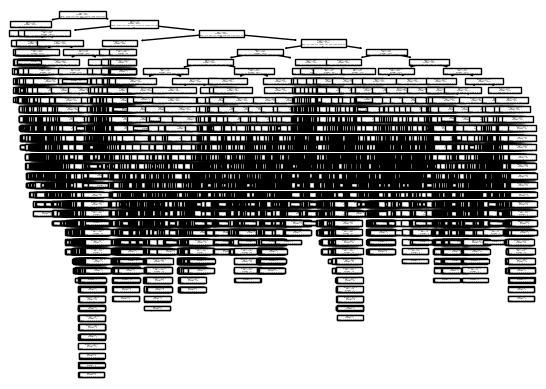

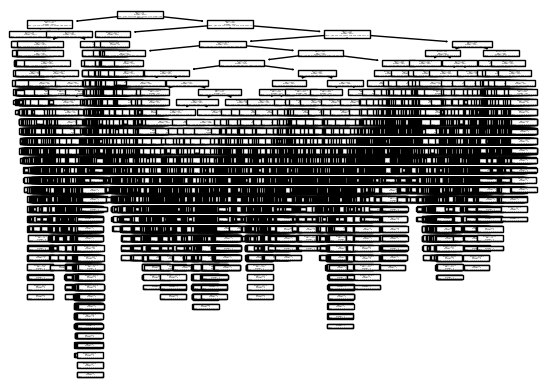

In [17]:
import matplotlib.pyplot as plt 
from sklearn import tree

for arbol in forest.estimators_:
    tree.plot_tree(arbol, feature_names=ataque.columns[[0,1,2]])
    plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt 


def metricas(reales, predichas):
    matriz = confusion_matrix(reales, predichas)
    exactitud = accuracy_score(reales, predichas)
    precision = precision_score(reales, predichas, average='micro')
    recall = recall_score(reales, predichas, average='micro')
    f1score = f1_score(reales, predichas, average='micro')
    return matriz, exactitud, precision, recall, f1score


def visualizar_metricas(reales, predichas, titulo):
    matriz, exactitud, precision, recall, f1score = \
        metricas(reales, predichas)

    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : No DDoS", "1 : Sí es DDoS"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Reales")
    plt.ylabel("Predichas")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % exactitud, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1score, fontsize=20)    
    plt.show()
    print("\n" * 10)


pred = forest.predict(X_test)

pred

array(['Syn', 'DrDoS_SNMP', 'DrDoS_LDAP', ..., 'TFTP', 'DrDoS_MSSQL',
       'DrDoS_MSSQL'], dtype=object)

In [37]:
metricas(y_test, pred)

TypeError: 'numpy.ndarray' object is not callable

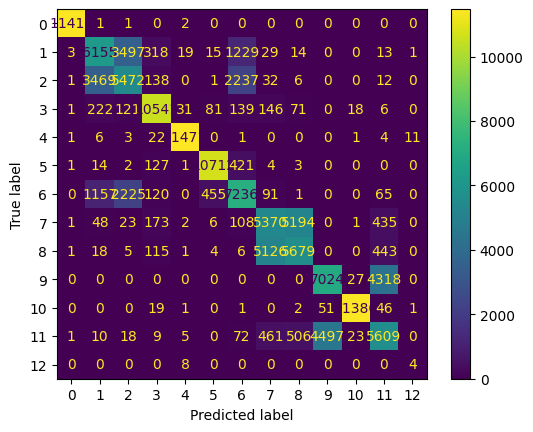

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix= confusion_matrix(y_test, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [18]:
print(forest.estimators_[1])

DecisionTreeClassifier(max_features='sqrt', random_state=723867906)
